In [1]:
import pandas as pd
import numpy as np
df_fission = pd.read_csv('/Users/blytheluo/Documents/GitHub/geektime/裂变关17/易速鲜花裂变转化.csv')
df_fission.head()

,用户码,性别,年龄,城市,入会月数,会员类型,活跃用户,会员积分,总消费,年收入,裂变方案,是否转化
0,1,女,40,杭州,9,2,1,516,6360.66,0.0000,疯狂打折,0
1,2,男,69,杭州,6,2,1,682,28605.00,0.0000,疯狂打折,0
2,3,女,32,杭州,9,1,1,803,10378.09,236311.0932,买一送一,1
3,4,女,37,苏州,0,2,1,778,25564.01,129909.8079,买一送一,1
4,5,男,55,苏州,4,3,0,547,3235.61,136976.1948,买一送一,1


/Users/blytheluo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


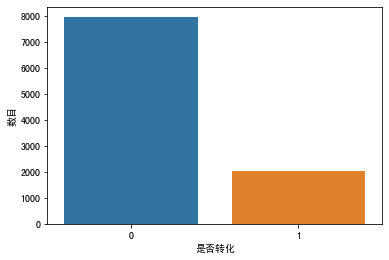

In [2]:
#数据可视化和预处理
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus'] = False
fig = sns.countplot('是否转化', data=df_fission)
plt.ylabel('数目')
plt.show()

In [3]:
df_fission['性别'].replace('女',0, inplace=True)
df_fission['性别'].replace('男',1, inplace=True)
print("Gender unique values",df_fission['性别'].unique())

Gender unique values [0 1]


In [4]:
df_fission = pd.get_dummies(df_fission, drop_first=True)
df_fission

,用户码,性别,年龄,入会月数,会员类型,活跃用户,会员积分,总消费,年收入,是否转化,城市_杭州,城市_苏州,裂变方案_疯狂打折
0,1,0,40,9,2,1,516,6360.66,0.0000,0,1,0,1
1,2,1,69,6,2,1,682,28605.00,0.0000,0,1,0,1
2,3,0,32,9,1,1,803,10378.09,236311.0932,1,1,0,0
3,4,0,37,0,2,1,778,25564.01,129909.8079,1,0,1,0
4,5,1,55,4,3,0,547,3235.61,136976.1948,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,49,7,2,1,746,1930.44,0.0000,0,0,0,1
9996,9997,1,36,1,1,0,569,29593.82,82517.8587,0,1,0,0
9997,9998,0,55,7,1,0,850,32841.84,0.0000,1,0,0,1
9998,9999,1,35,5,1,1,529,21564.34,117800.7531,0,0,0,0


In [5]:
#构建标签和特征数据集，并拆分出训练集和测试集
X = df_fission.drop(['是否转化', '用户码'], axis=1)
y = df_fission.是否转化.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
#算法选择：集成学习 1. AdaBoost 算法
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (f1_score, confusion_matrix) # 导入评估指标
dt = DecisionTreeClassifier()
ada = AdaBoostClassifier(dt)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print('ada测试准确率:%{:.2f}%'.format(ada.score(X_test, y_test)*100))
print('ada测试f1score:%{:.2f}%'.format(f1_score(y_test, y_pred)*100))

ada测试准确率:%78.70%
ada测试f1score:%49.16%


In [8]:
#2. GBDT 算法
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print('梯度提升准确率:{:.2f}%'.format(gb.score(X_test, y_test)*100))
print('梯度提升f1:{:.2f}%'.format(f1_score(y_test, y_pred)*100))

梯度提升准确率:86.45%
梯度提升f1:59.25%


In [9]:
#3. XGBoost 算法

In [10]:
#导xgboost包
conda install py-xgboost

SyntaxError: invalid syntax (<ipython-input-10-8881aef924a0>, line 2)

In [11]:
from xgboost import XGBClassifier # 导入XGB 模型
xgb = XGBClassifier() # XGB 模型
xgb.fit(X_train, y_train) # 拟合模型
y_pred = xgb.predict(X_test) # 进行预测
print("XGB 测试准确率: {:.2f}%".format(xgb.score(X_test, y_test)*100))
print("XGB 测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))

/Users/blytheluo/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:55:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB 测试准确率: 85.15%
XGB 测试F1分数: 57.75%


In [12]:
#降低方差：Bagging 方法
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (f1_score, confusion_matrix)
bdt = BaggingClassifier(DecisionTreeClassifier())
bdt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("decisiontree测试准确率: {:.2f}%".format(dt.score(X_test, y_test)*100))
print("decisiontree测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("rf测试准确率: {:.2f}%".format(rf.score(X_test, y_test)*100))
print("rf测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))

rf测试准确率: 86.15%
rf测试F1分数: 58.22%


In [14]:
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier()
ext.fit(X_train, y_train)
y_pred = ext.predict(X_test)
print("ext测试准确率: {:.2f}%".format(ext.score(X_test, y_test)*100))
print("ext测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))

ext测试准确率: 85.05%
ext测试F1分数: 53.79%
